<h1>Credit Card Debt prediction model</h1>

<h3>About Credit card dataset</h3>

<h5>'The dataset contains the various numerical and categearical features related to the each customer. Dataset is downloaded from here.' </h5>

<h4> Problem Statement -: Build the model which will predict the credit card debt based on the customers past trasanction and various feature to set credit card limit </h4>

<h4><b>Importing Libraries</b></h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h4><b>Reding the dataset</b></h4>

In [2]:
df = pd.read_excel('Data Set.xlsx')

In [3]:
df.shape

(5000, 130)

In [4]:
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [5]:
df.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


<h4><b>Basic info of the dataset</b></h4>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


<h4><b>Checking if any customer is repeated or duplicated in dataset</b></h4>

In [7]:
(df['custid'].value_counts()>1).sum()

0

<h4><b>Checking the null value in the dataset</b></h4>

In [8]:
null_value = df.isnull().sum()

In [9]:
null_value[null_value > 0]

townsize          2
lncreddebt        1
lnothdebt         1
commutetime       2
longten           3
lnlongten         3
lntollmon      2622
lntollten      2622
lnequipmon     3296
lnequipten     3296
lncardmon      1419
cardten           2
lncardten      1422
lnwiremon      3656
lnwireten      3656
dtype: int64

<h4><b>Checking the percentage of null value</b></h4>

In [10]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan=percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [11]:
percent_missing(df)

lncreddebt      0.02
lnothdebt       0.02
townsize        0.04
commutetime     0.04
cardten         0.04
longten         0.06
lnlongten       0.06
lncardmon      28.38
lncardten      28.44
lntollmon      52.44
lntollten      52.44
lnequipmon     65.92
lnequipten     65.92
lnwiremon      73.12
lnwireten      73.12
dtype: float64

<h4><b>Setting the max 20% criteria for the null value (Most of the columns are logrithimic value of the base value)</b></h4>

In [12]:
percent_missing(df).index

Index(['lncreddebt', 'lnothdebt', 'townsize', 'commutetime', 'cardten', 'longten', 'lnlongten', 'lncardmon', 'lncardten', 'lntollmon', 'lntollten', 'lnequipmon', 'lnequipten', 'lnwiremon', 'lnwireten'], dtype='object')

In [13]:
df.shape

(5000, 130)

<h4><b>Dropping the table having more than 20% null value</b></h4>

In [14]:
df = df.drop(['lncardmon','lncardten', 'lntollmon', 'lntollten', 'lnequipmon', 'lnequipten', 'lnwiremon', 'lnwireten'],axis=1)

In [15]:
df.shape

(5000, 122)

In [16]:
percent_missing(df)

lncreddebt     0.02
lnothdebt      0.02
townsize       0.04
commutetime    0.04
cardten        0.04
longten        0.06
lnlongten      0.06
dtype: float64

<h4><b>Trying to fill the lnlogten value using current value</b></h4>

<AxesSubplot:xlabel='lnlongten', ylabel='Count'>

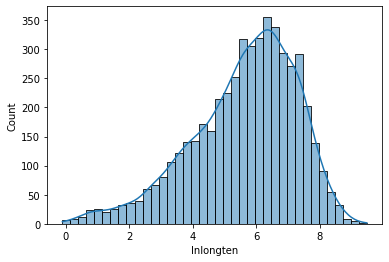

In [17]:
sns.histplot(df['lnlongten'],kde=True)

<h4><b>As lnlongten is fairly normally distributed we will fill the value with mean value of lnlongten</b></h4>

In [18]:
df[df['lnlongten'].isnull()][['lncreddebt', 'lnothdebt', 'townsize', 'commutetime', 'cardten', 'longten', 'lnlongten']]

,lncreddebt,lnothdebt,townsize,commutetime,cardten,longten,lnlongten
841,-0.800109,0.636958,4.0,28.0,0.0,NaN,NaN
2757,-0.549774,0.966573,3.0,24.0,NaN,NaN,NaN
3479,-2.136511,-0.978342,3.0,26.0,NaN,NaN,NaN


In [19]:
df['lnlongten'] = df['lnlongten'].fillna(df['lnlongten'].mean())

<h4><b>Now fill the value with exponential value of their respective lnlongten value</b></h4>

In [20]:
df[df['longten'].isnull()][['lncreddebt', 'lnothdebt', 'townsize', 'commutetime', 'cardten', 'longten', 'lnlongten']]

,lncreddebt,lnothdebt,townsize,commutetime,cardten,longten,lnlongten
841,-0.800109,0.636958,4.0,28.0,0.0,NaN,5.611298
2757,-0.549774,0.966573,3.0,24.0,NaN,NaN,5.611298
3479,-2.136511,-0.978342,3.0,26.0,NaN,NaN,5.611298


In [21]:
df['longten'] = df['longten'].fillna(np.exp(5.611298))

<h4><b>Trying to fill the cardten missing value</b></h4>

In [22]:
df[df['cardten'].isnull()][['lncreddebt', 'lnothdebt', 'townsize', 'commutetime', 'cardten', 'longten', 'lnlongten']]

,lncreddebt,lnothdebt,townsize,commutetime,cardten,longten,lnlongten
2757,-0.549774,0.966573,3.0,24.0,NaN,273.499009,5.611298
3479,-2.136511,-0.978342,3.0,26.0,NaN,273.499009,5.611298


<AxesSubplot:xlabel='cardten', ylabel='Count'>

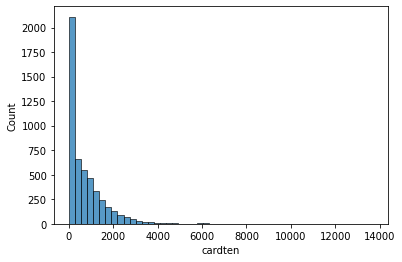

In [23]:
sns.histplot(df['cardten'],bins=50)

<h4><b>As most of the value are zero so we replace the null with zero</b></h4>

In [24]:
df['cardten'] = df['cardten'].fillna(0)

In [25]:
percent_missing(df)

lncreddebt     0.02
lnothdebt      0.02
townsize       0.04
commutetime    0.04
dtype: float64

In [26]:
df[df['townsize'].isnull()][['lncreddebt', 'lnothdebt', 'townsize', 'commutetime', 'cardten', 'longten', 'lnlongten']]

,lncreddebt,lnothdebt,townsize,commutetime,cardten,longten,lnlongten
961,0.810659,1.725550,NaN,NaN,260.0,75.95,4.330075
2731,0.079077,1.063576,NaN,NaN,0.0,96.95,4.574195


In [28]:
df[df['lncreddebt'].isnull()][['creddebt','lncreddebt','othdebt', 'lnothdebt', 'townsize', 'commutetime', 'cardten', 'longten', 'lnlongten']]

,creddebt,lncreddebt,othdebt,lnothdebt,townsize,commutetime,cardten,longten,lnlongten
2294,0.0,NaN,0.0,NaN,3.0,28.0,600.0,1805.55,7.498621


<h4><b>We will directly drop the rest rows containing the null value for following reasons</b></h4>
<ul>
  <li>Townsize is catagerical value so cannot replace it</li>
  <li>Commutetime null value rows are same as the townsize null value row</li>
  <li>lncreddebt and lnothdebt cannot be replace as it their base value are 0</li>
</ul>

In [27]:
df = df.dropna()

<AxesSubplot:>

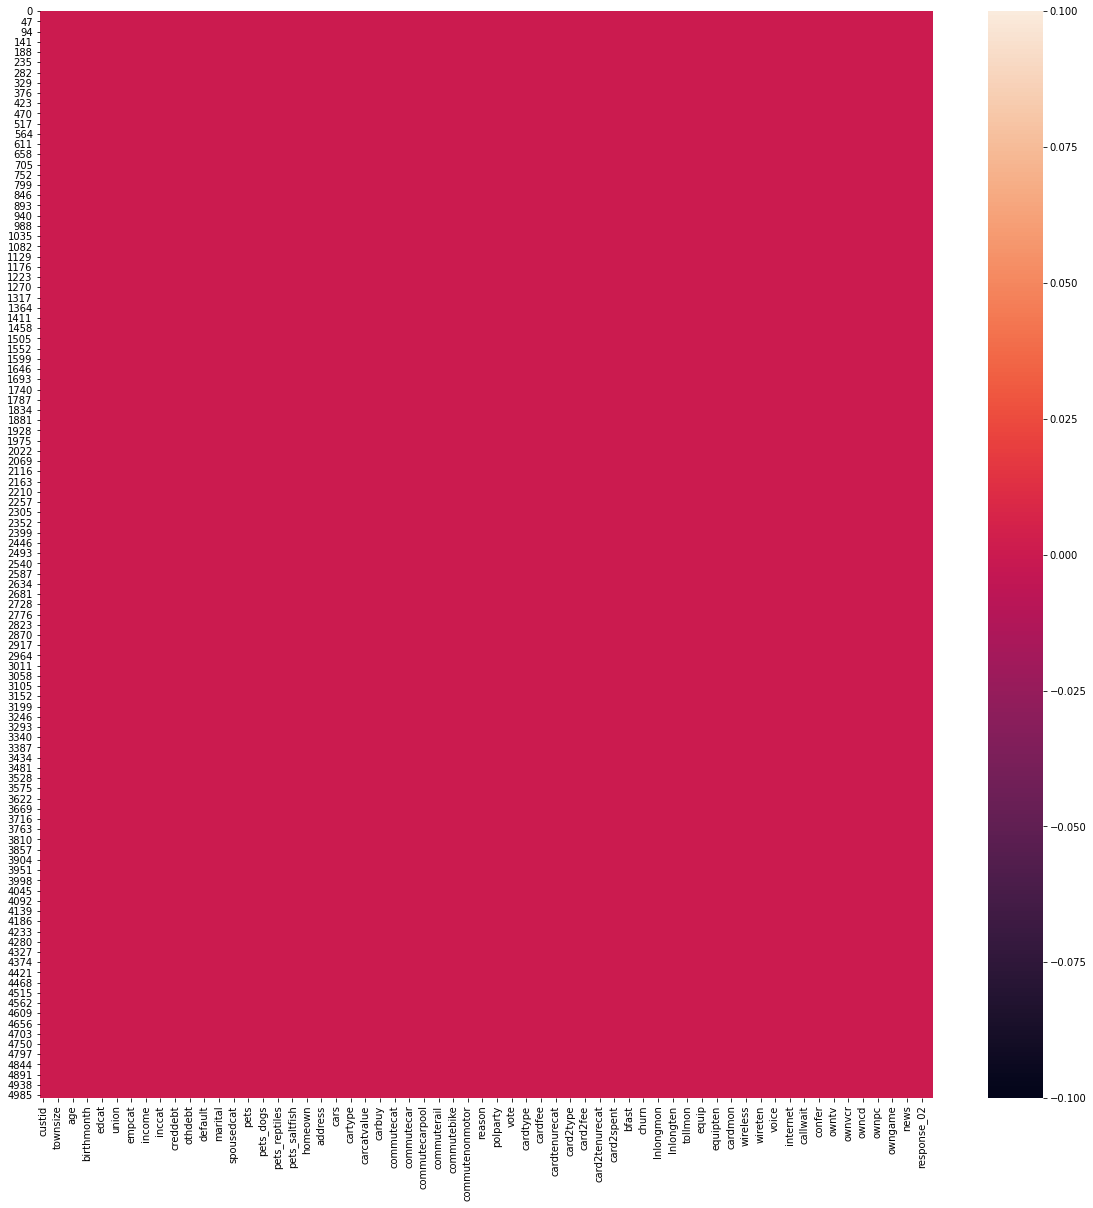

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull())

<h4><b>We will drop the some columns base on the data dictionary excel file</b></h4>

In [29]:
col_to_drop =['cars',
'address',
'spousedcat',
'default',
'employ',
'cardtenure',
'card2tenure',
'custid',
'age',
'ed',
'spoused',
'pets',
'tenure',
'churn',
'card2tenure',
'lnlongten'
]

In [30]:
df = df.drop(df[col_to_drop],axis=1)

In [31]:
df.shape

(4997, 107)

In [32]:
df.dtypes

region           int64
townsize       float64
gender           int64
agecat           int64
birthmonth      object
                ...   
ownfax           int64
news             int64
response_01      int64
response_02      int64
response_03      int64
Length: 107, dtype: object

In [33]:
df.select_dtypes(include= 'float64')

,townsize,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,carvalue,commutetime,cardspent,card2spent,longmon,lnlongmon,longten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten
0,2.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,14.3,22.0,81.66,67.80,6.50,1.871802,34.40,29.0,161.05,29.50,126.10,14.25,60.0,0.00,0.00
1,5.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,6.8,29.0,42.60,34.94,8.90,2.186051,330.60,0.0,0.00,54.85,1975.00,16.00,610.0,45.65,1683.55
2,4.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,18.8,24.0,184.22,175.75,28.40,3.346389,1858.35,0.0,0.00,0.00,0.00,23.00,1410.0,0.00,0.00
3,3.0,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,8.7,38.0,340.99,18.42,6.00,1.791759,199.45,0.0,0.00,0.00,0.00,21.00,685.0,0.00,0.00
4,2.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,10.6,32.0,255.10,252.73,3.05,1.115142,74.10,16.5,387.70,0.00,0.00,17.25,360.0,19.05,410.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.0,5.278115,8.0,7.934080,2.071167,7.745920,2.047166,64.5,21.0,872.11,553.56,34.10,3.529297,2405.90,0.0,0.00,0.00,0.00,21.75,1565.0,0.00,0.00
4996,3.0,4.418841,15.0,3.336600,1.204952,9.113400,2.209746,40.0,26.0,210.81,155.54,10.40,2.341806,289.00,36.5,1157.20,0.00,0.00,26.25,800.0,27.90,757.35
4997,5.0,4.682131,10.8,3.557520,1.269064,8.106480,2.092664,53.6,32.0,884.08,643.67,29.40,3.380995,2109.25,44.0,3322.50,0.00,0.00,15.25,1070.0,0.00,0.00
4998,1.0,5.241747,10.8,5.021352,1.613699,15.390648,2.733760,96.0,12.0,381.35,371.60,7.95,2.073172,282.70,0.0,0.00,29.55,1032.85,9.50,345.0,0.00,0.00


In [34]:
df.select_dtypes(exclude= 'float64')

,region,gender,agecat,birthmonth,edcat,jobcat,union,empcat,retire,income,inccat,jobsat,marital,reside,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,addresscat,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenurecat,active,bfast,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,1,2,September,3,1,1,1,0,31,2,1,0,3,0,0,0,0,0,0,0,0,2,1,1,0,1,0,0,8,4,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,5,3,1,0,2,0,3,1,1,1,0,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,5,0,2,May,4,2,0,1,0,15,1,1,0,2,0,0,0,0,0,0,6,1,3,1,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,2,4,1,3,0,2,1,1,0,1,1,1,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,3,1,6,June,2,2,0,5,0,35,2,4,1,3,2,1,0,0,0,0,0,1,1,5,1,1,1,0,1,4,3,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,5,4,1,3,0,5,0,3,0,0,1,0,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4,0,2,May,3,2,0,1,0,20,1,2,1,5,0,0,0,0,0,0,0,1,3,2,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,2,3,2,4,0,2,1,1,0,0,1,0,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,2,0,3,July,3,2,0,1,0,23,1,1,1,4,0,0,0,0,0,0,0,0,2,2,0,1,1,0,1,6,3,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,3,1,3,2,0,3,1,3,1,0,1,1,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,0,6,January,1,1,0,5,0,196,5,1,0,1,4,0,0,0,0,0,0,1,1,4,1,0,3,0,0,5,3,0,0,0,0,1,0,0,0,0,0,9,4,0,1,1,1,3,3,0,5,3,3,4,0,5,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,19,1,1,1,0,0,0,0,0,1,0,0,0
4996,3,0,5,May,2,1,0,3,0,83,4,5,0,1,0,0,0,0,0,0,1,1,1,3,1,1,3,1,1,4,3,1,0,0,1,0,1,0,0,0,0,9,4,0,0,0,3,4,4,0,4,5,1,2,0,4,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,1,14,1,1,1,0,0,0,0,0,0,0,0,0
4997,4,0,6,August,4,1,0,5,0,108,4,3,0,1,0,0,0,0,0,0,0,1,3,5,1,0,3,1,0,1,1,1,0,1,1,0,0,0,1,0,0,9,4,0,0,0,1,3,1,0,5,2,4,4,0,5,0,3,1,0,1,0,1,0,0,0,1,1,1,1,0,1,16,1,1,1,1,0,0,0,0,1,0,0,0
4998,1,0,4,December,4,2,0,2,0,189,5,4,1,4,0,0,0,0,0,0,0,1,1,4,1,1,3,1,1,1,1,1,0,0,0,1,0,0,0,0,0,9,2,1,1,0,3,1,1,0,5,4,3,1,0,4,0,3,0,1,1,0,1,0,0,3,0,0,0,0,1,1,24,1,1,1,0,1,1,1,0,1,0,0,0


<h4><b>As most of the categarical features have int64 datatype. We will convert them into object datatype.</b></h4>

In [35]:
to_convert = df[df.select_dtypes(exclude= 'float64').columns.difference(['income','hourstv'])].columns

In [36]:
df[to_convert] = df[to_convert].astype('object')

In [37]:
df.dtypes

region          object
townsize       float64
gender          object
agecat          object
birthmonth      object
                ...   
ownfax          object
news            object
response_01     object
response_02     object
response_03     object
Length: 107, dtype: object

<h4><b>Checking the corelation of the feature with the target value i.e. creddebt</b></h4>

<h4><b>First we get the dummy variable for the categerical features</b></h4>

In [38]:
df_new = pd.get_dummies(df,drop_first=True)

In [39]:
df_new.head()

,townsize,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,carvalue,commutetime,cardspent,card2spent,longmon,lnlongmon,longten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,region_2,region_3,region_4,region_5,gender_1,agecat_3,agecat_4,agecat_5,agecat_6,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,jobsat_2,jobsat_3,jobsat_4,jobsat_5,marital_1,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,reside_9,pets_cats_1,pets_cats_2,pets_cats_3,pets_cats_4,pets_cats_5,pets_cats_6,pets_dogs_1,pets_dogs_2,pets_dogs_3,pets_dogs_4,pets_dogs_5,pets_dogs_7,pets_birds_1,pets_birds_2,pets_birds_3,pets_birds_4,pets_birds_5,pets_reptiles_1,pets_reptiles_2,pets_reptiles_3,pets_reptiles_4,pets_reptiles_5,pets_reptiles_6,pets_small_1,pets_small_2,pets_small_3,pets_small_4,pets_small_5,pets_small_6,pets_small_7,pets_saltfish_1,pets_saltfish_2,pets_saltfish_3,pets_saltfish_4,pets_saltfish_5,pets_saltfish_6,pets_saltfish_7,pets_saltfish_8,pets_freshfish_1,pets_freshfish_2,pets_freshfish_3,pets_freshfish_4,pets_freshfish_5,pets_freshfish_6,pets_freshfish_7,pets_freshfish_8,pets_freshfish_9,pets_freshfish_10,pets_freshfish_11,pets_freshfish_12,pets_freshfish_13,pets_freshfish_14,pets_freshfish_15,pets_freshfish_16,homeown_1,hometype_2,hometype_3,hometype_4,addresscat_2,addresscat_3,addresscat_4,addresscat_5,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,bfast_2,bfast_3,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,2.0,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,14.3,22.0,81.66,67.80,6.50,1.871802,34.40,29.0,161.05,29.50,126.1,14.25,60.0,0.00,0.00,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,5.0,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,6.8,29.0,42.60,34.94,8.90,2.186051,330.60,0.0,0.00,54.85,1975.0,16.00,610.0,45.65,1683.55,18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,

In [40]:
df_new.shape

(4997, 246)

In [41]:
corr_debt = df_new.corr()['creddebt'].sort_values()

In [42]:
df_corr = pd.DataFrame(data = corr_debt.values,index=corr_debt.index.to_list(),columns=['Feature'])

In [43]:
df_corr.sort_values(by='Feature').head()

,Feature
carcatvalue_1,-0.285892
inccat_2,-0.143955
retire_1,-0.122075
carown_0,-0.121791
jobcat_2,-0.107781


<h4><b>Considering only those feature which are corelated with target value more than 0.1. Rest we will ignore</b></h4>
<ul>

In [44]:
y = []
def convert_abs(x):
    x = abs(x)
    y.append(x)

In [45]:
df_corr['Feature'].apply(convert_abs);

In [46]:
df_corr['Feature'] = y

In [47]:
del_lesscorrcol = df_corr[df_corr['Feature']<0.1].sort_values(by = 'Feature').index.to_list()

In [48]:
df_new = df_new.drop(del_lesscorrcol,axis=1)

In [49]:
df_new.corr()['creddebt'].sort_values()

carcatvalue_1      -0.285892
inccat_2           -0.143955
retire_1           -0.122075
carown_0           -0.121791
jobcat_2           -0.107781
ownvcr_1            0.108645
multline_1          0.109078
longmon             0.110495
owndvd_1            0.113155
carown_1            0.113562
longten             0.114879
wiremon             0.115534
lnlongmon           0.119941
jobsat_5            0.121022
card2tenurecat_5    0.125474
cardtenurecat_5     0.134879
inccat_4            0.139839
tollmon             0.141013
wireten             0.148386
agecat_5            0.160979
empcat_5            0.163689
tollten             0.170341
card2spent          0.218853
cardspent           0.249890
debtinc             0.368451
carcatvalue_3       0.380695
inccat_5            0.431760
carvalue            0.442990
lnothdebt           0.462575
lninc               0.489750
lncreddebt          0.629051
othdebt             0.667322
income              0.667925
creddebt            1.000000
Name: creddebt

<h4><b>Some feature is repeated in logrethmic form. We will simply remove them</b></h4>

In [50]:
ln_col_to_drop = ['lninc','lnlongmon','lnothdebt']

In [51]:
df_new = df_new.drop(df[ln_col_to_drop],axis=1)

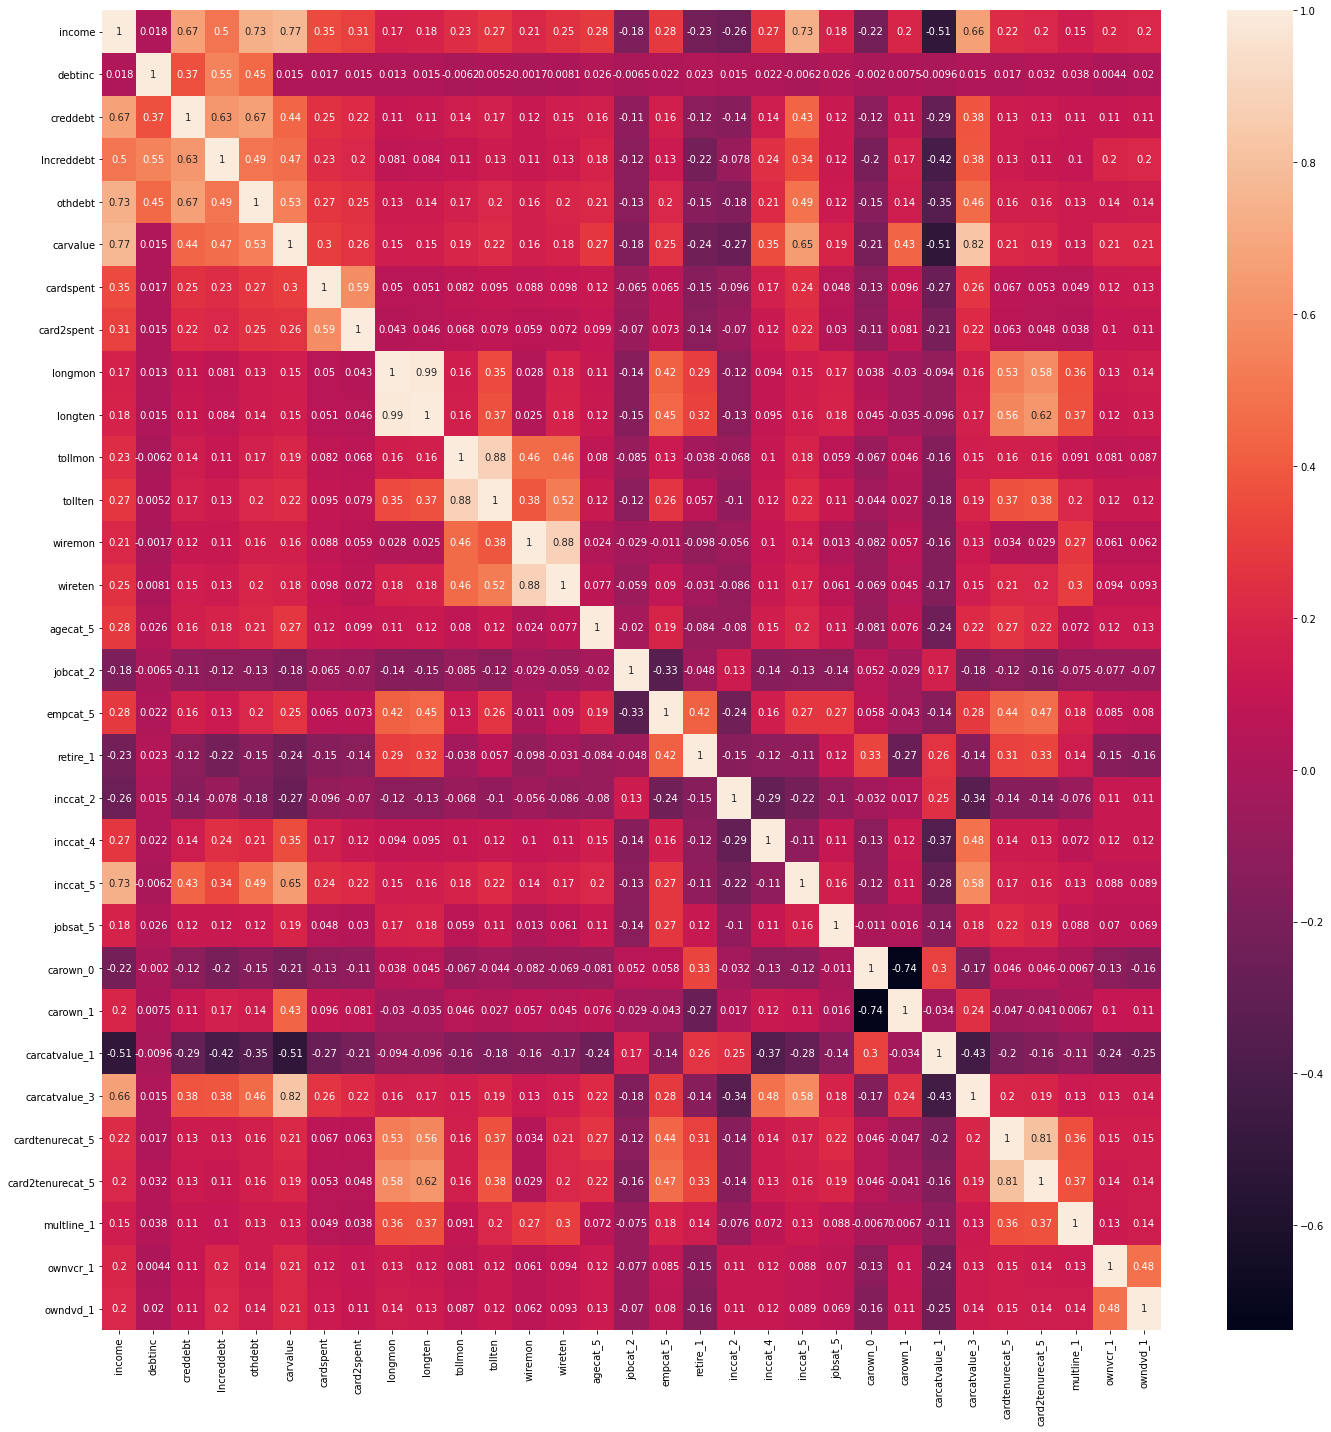

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True)
plt.tight_layout()

<h4><b>As observe from the heatmap some of the features are highly corelated with each other so we will consider only one of them and drop other</b></h4>

In [53]:
feat_corr = df[['longten','tollten','wireten']]

In [54]:
df_new = df_new.drop(feat_corr,axis=1)

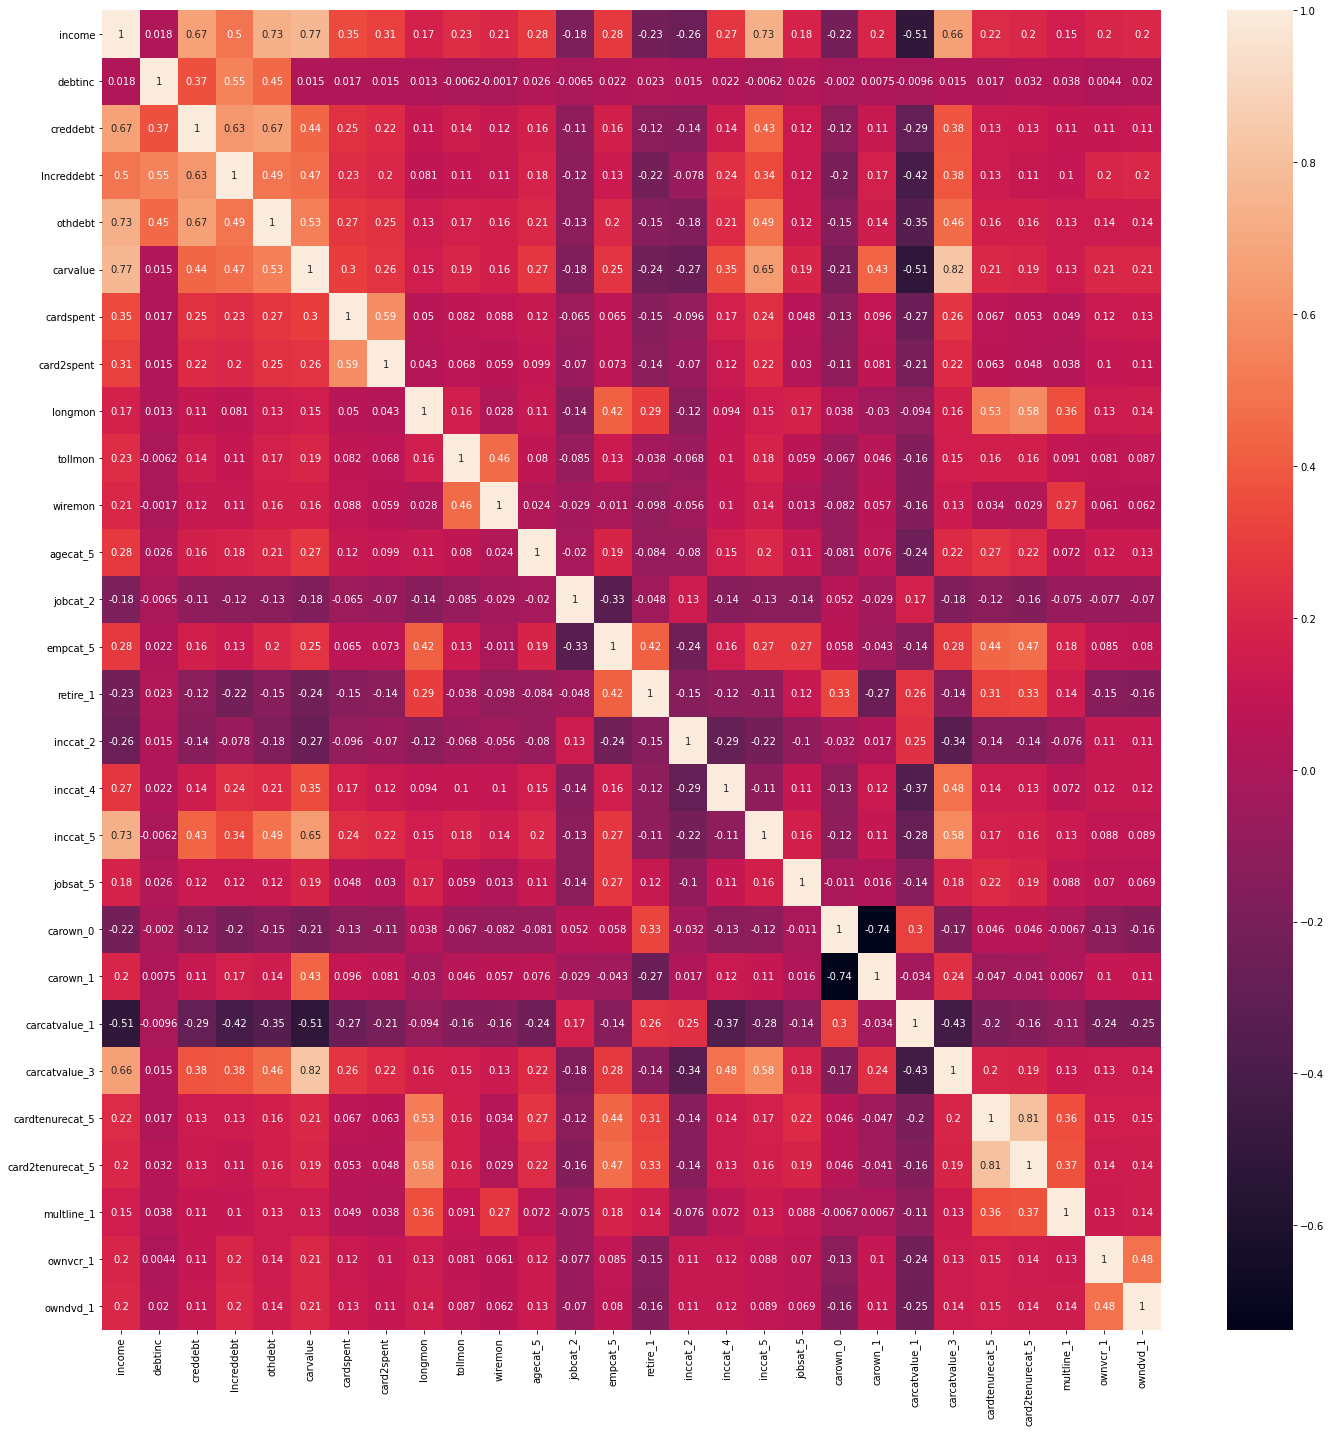

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True)
plt.tight_layout()

<h1><b>EDA</b></h1>

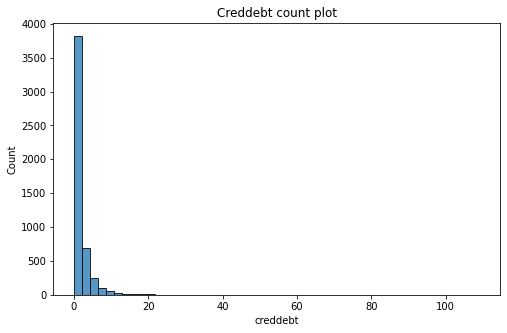

In [56]:
plt.figure(figsize=(8,5))
sns.histplot(df['creddebt'],bins=50)
plt.title('Creddebt count plot');

<h5>As observe that target value is not normally distributed so we will consider its log value as  a target </h5>

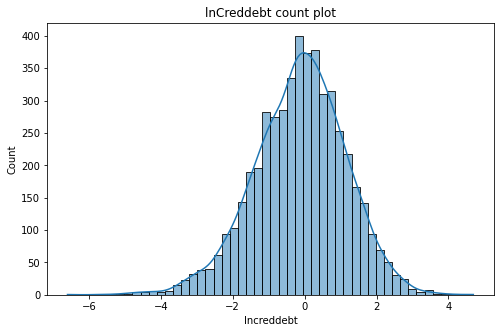

In [57]:
plt.figure(figsize=(8,5))
sns.histplot(df['lncreddebt'],bins=50,kde=True)
plt.title('lnCreddebt count plot');

<h5>Now the traget value is normally distributed</h5>

<AxesSubplot:xlabel='gender', ylabel='lncreddebt'>

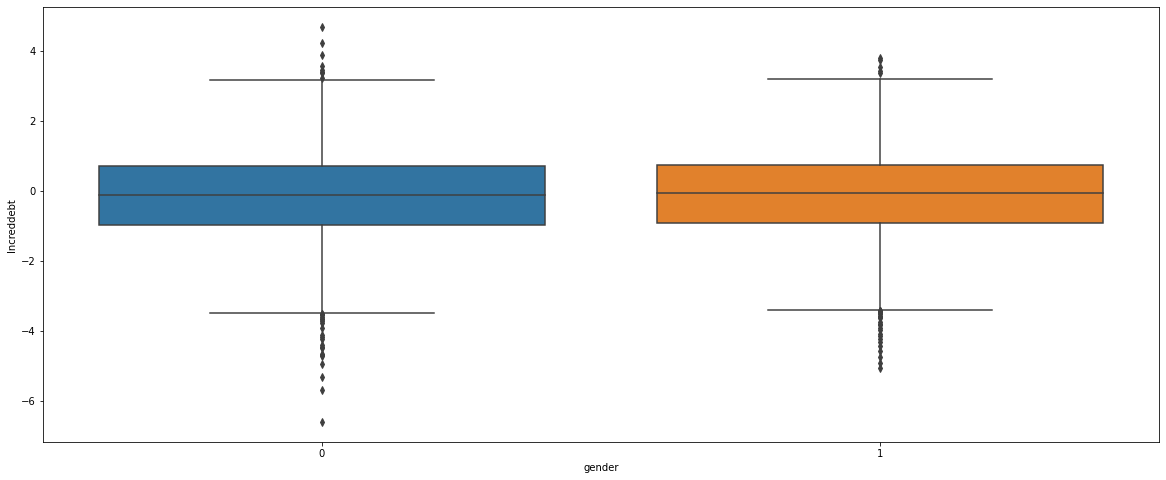

In [58]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df,x='gender',y='lncreddebt')

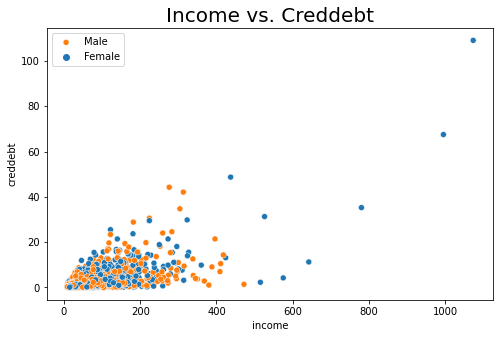

In [59]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='income',y='creddebt',hue='gender')
plt.title('Income vs. Creddebt', fontsize = 20)
plt.legend(['Male','Female'])

<h5>As income is increses credit debt is also increses also females creditdebt is more than the males</h5>

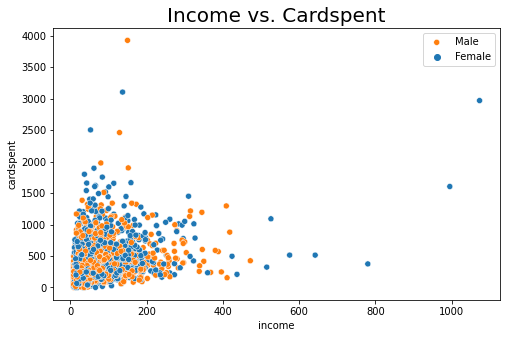

In [60]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='income',y='cardspent',hue='gender')
plt.title('Income vs. Cardspent', fontsize = 20)
plt.legend(['Male','Female'])

<h5>Similar observation is seen that females tend to spent more as their income increses</h5>

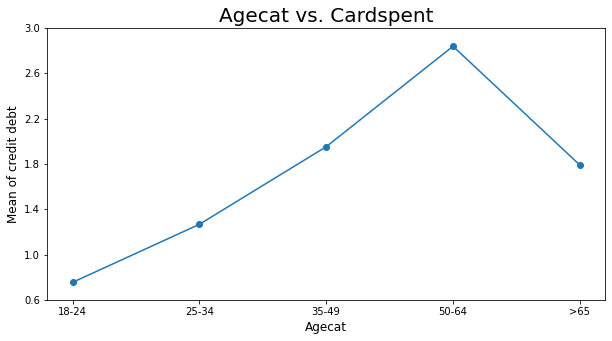

In [61]:
plt.figure(figsize=(10,5))
x = df.groupby('agecat')['creddebt'].mean()
plt.plot(x.index,x.values,'-o')
plt.xticks(range(2,7),labels=['18-24','25-34','35-49','50-64','>65'])
plt.title('Agecat vs. Cardspent', fontsize = 20)
plt.yticks(np.arange(0.6,3.2,0.40))
plt.xlabel('Agecat', fontsize =12)
plt.ylabel('Mean of credit debt',fontsize =12);

<h5>As age is increases the credit card debt also increases. It is highest for 50-64 age group and lowest for 18-24</h5>

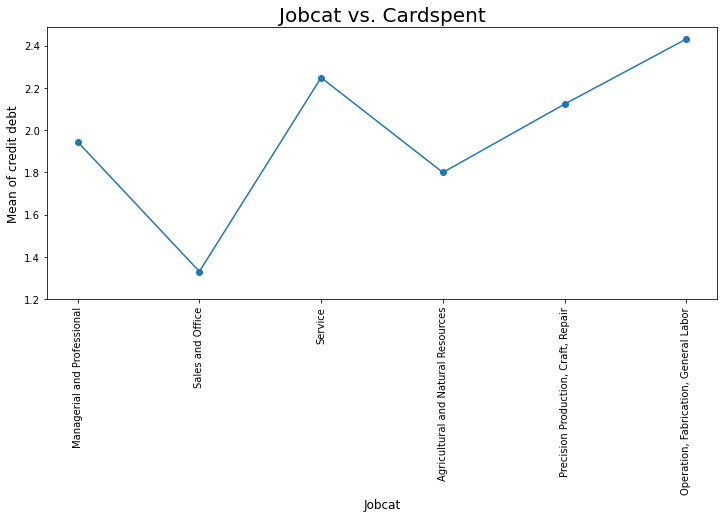

In [62]:
plt.figure(figsize=(12,5))
x = df.groupby('jobcat')['creddebt'].mean()
plt.plot(x.index,x.values,'-o',)
#ns.lineplot(x=x.index,y=x.values,markers='o',markersize =100)
plt.xticks(range(1,7),labels=['Managerial and Professional','Sales and Office','Service',
                              'Agricultural and Natural Resources','Precision Production, Craft, Repair',
                              'Operation, Fabrication, General Labor'],rotation = 90)
plt.title('Jobcat vs. Cardspent', fontsize = 20)
plt.yticks(np.arange(1.2,2.6,0.20))
plt.xlabel('Jobcat', fontsize =12)
plt.ylabel('Mean of credit debt',fontsize =12);

<h5>Carddebt is highest for the Operation, Fabrication, General Labors and lowest for the Sales and Office workers</h5>

<h1>Model to predict the credit card debt</h1>

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = df_new.drop(['creddebt','lncreddebt'],axis=1)

In [65]:
y = df_new['lncreddebt']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [67]:
from sklearn.metrics import adjusted_rand_score

In [68]:
import statsmodels.api as sm

In [69]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [70]:
sm_model = sm.OLS(y_train,X_train).fit()

In [71]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:             lncreddebt   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     240.8
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:17:03   Log-Likelihood:                -3995.4
No. Observations:                3497   AIC:                             8045.
Df Residuals:                    3470   BIC:                             8211.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.2062      0.079  

Column to delete according to the ols report

In [72]:
col_to_del = ['cardspent','longmon','tollmon','wiremon','agecat_5','jobcat_2','empcat_5','inccat_5','jobsat_5','carown_0','carown_1','card2tenurecat_5','multline_1','owndvd_1']

In [73]:
X_train = X_train.drop(col_to_del,axis=1)

In [74]:
X_test = X_test.drop(col_to_del,axis=1)

In [75]:
sm_model2 = sm.OLS(y_train,X_train).fit()

In [76]:
print(sm_model2.summary())

                            OLS Regression Results                            
Dep. Variable:             lncreddebt   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     521.1
Date:                Wed, 11 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:17:23   Log-Likelihood:                -4001.4
No. Observations:                3497   AIC:                             8029.
Df Residuals:                    3484   BIC:                             8109.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1954      0.064    -

In [77]:
X_train.shape

(3497, 13)

In [78]:
X_test.shape

(1500, 13)

<h1>Support Vector Machine Regressor</h1>

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [80]:
svr = SVR()

In [81]:
scaler = StandardScaler()

In [82]:
operation = [('scaler',scaler),('svr',svr)]

In [83]:
pipe = Pipeline(operation)

In [84]:
param_grid = {'svr__C':[0.001,0.01,0.1,0.5,1],
             'svr__kernel':['linear','rbf'],
              'svr__gamma':['scale','auto'],
              'svr__epsilon':[0.1,0.5,1,2]}

In [85]:
svr_grid = GridSearchCV(pipe,param_grid)

In [86]:
svr_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.001, 0.01, 0.1, 0.5, 1],
                         'svr__epsilon': [0.1, 0.5, 1, 2],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['linear', 'rbf']})

In [87]:
svr_grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(C=1))])

In [88]:
svr_prediction = svr_grid.predict(X_test)

In [89]:
MAE = mean_absolute_error(y_test,svr_prediction)
RMSE = np.sqrt(mean_squared_error(y_test,svr_prediction))

In [90]:
MAE

0.3698961071624843

In [91]:
RMSE

0.5804090801331893

In [92]:
from sklearn.metrics import r2_score

In [93]:
r2_score(y_test,svr_prediction)

0.7941970469771635

In [94]:
r2_score(np.exp(y_test),np.exp(svr_prediction))

0.7057222951000295

In [95]:
y_test

1614   -1.981771
4846    0.332625
345    -0.294854
4672   -1.370421
54      0.114899
          ...   
4325   -0.756311
3872   -0.686537
4692    0.638717
790    -0.980893
4038   -0.414389
Name: lncreddebt, Length: 1500, dtype: float64

In [96]:
svr_prediction

array([-1.42660826,  0.24851785,  0.70061051, ...,  0.12848912,
       -0.98102939, -0.89503491])

In [98]:
np.exp(y_test)

1614    0.137825
4846    1.394624
345     0.744640
4672    0.254000
54      1.121760
          ...   
4325    0.469395
3872    0.503316
4692    1.894050
790     0.374976
4038    0.660744
Name: lncreddebt, Length: 1500, dtype: float64

In [99]:
np.exp(svr_prediction)

array([0.24012197, 1.28212371, 2.0149825 , ..., 1.13710905, 0.37492496,
       0.40859334])

In [457]:
df_new['lncreddebt']

0       0.183079
1       0.200505
2      -0.074056
3      -3.780995
4      -1.538705
          ...   
4995    2.071167
4996    1.204952
4997    1.269064
4998    1.613699
4999    0.818744
Name: lncreddebt, Length: 4997, dtype: float64

<h1> Random Forest Regressor </h1>

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rf_model = RandomForestRegressor()

In [102]:
rf_param_grid ={'n_estimators':[50,100,120,150],
                'max_features':[4,5,6,7], 
                'max_depth':[3,4,5,6,7,8,9], 
                'max_leaf_nodes':[10,11,12,13,14,15]}

In [103]:
rf_grid = GridSearchCV(rf_model,param_grid=rf_param_grid)

In [104]:
rf_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': [4, 5, 6, 7],
                         'max_leaf_nodes': [10, 11, 12, 13, 14, 15],
                         'n_estimators': [50, 100, 120, 150]})

In [105]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=8, max_features=7, max_leaf_nodes=15,
                      n_estimators=120)

In [106]:
rf_prediction = rf_grid.predict(X_test)

In [107]:
MAE = mean_absolute_error(y_test,rf_prediction)
RMSE = np.sqrt(mean_squared_error(y_test,rf_prediction))

In [108]:
MAE

0.5857500327940903

In [109]:
RMSE

0.7626066738319017

In [110]:
r2_score(y_test,rf_prediction)

0.6447088341153846

In [111]:
r2_score(np.exp(y_test),np.exp(rf_prediction))

0.4380573398084284

In [112]:
rf_grid.score(X_test,y_test)

0.6447088341153846

<h3> Support vector machine regressor gives better results than Random forest regressor </h3>